SVM 0.8571428571428571
[[51  3]
 [10 27]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        54
         1.0       0.90      0.73      0.81        37

    accuracy                           0.86        91
   macro avg       0.87      0.84      0.85        91
weighted avg       0.86      0.86      0.85        91

roc_auc_SVM 0.8370870870870871
LR 0.8461538461538461
[[49  5]
 [ 9 28]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88        54
         1.0       0.85      0.76      0.80        37

    accuracy                           0.85        91
   macro avg       0.85      0.83      0.84        91
weighted avg       0.85      0.85      0.84        91

roc_auc_LR 0.8320820820820821
  mixed  p  q 0.8571 0.95 0.05
  mixed  p  q 0.8571 0.90 0.10
  mixed  p  q 0.8571 0.85 0.15
  mixed  p  q 0.8462 0.80 0.20
  mixed  p  q 0.8462 0.75 0.25
  mixed  p  q 0.8462 0.70 0.30
  mixed  p  q 0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive sam

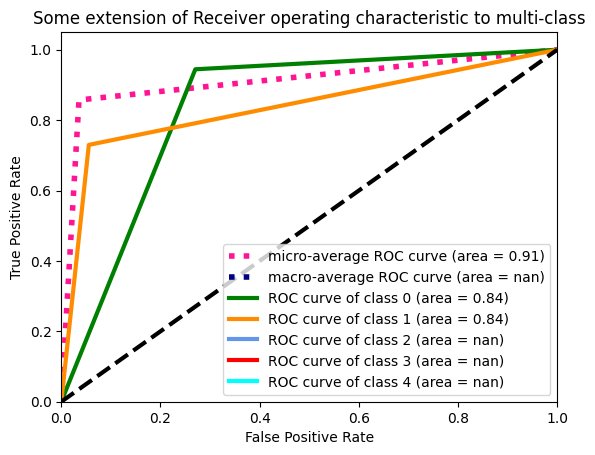

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib import pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier

dataset = pd.read_csv("/content/sample_data/binary classification.csv", delimiter=",")
dataset_array = dataset.to_numpy()
x = dataset_array[:,0:13]
y = dataset_array[:,13]

#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))

"""Information based algorithms (Decision Trees, Random Forests) and probability based algorithms (Naive Bayes, Bayesian Networks) don't require normalization either."""

# code for SVM

from sklearn.svm import SVC
model4 = SVC(probability=True,C=1,gamma=.01)

scaled_X_train_svm=sc.fit_transform(X_train)
scaled_X_test_svm=sc.transform(X_test)

# features for SVM
scaled_X_train_svm1 = scaled_X_train_svm[:,0:13]
scaled_X_test_svm1 = scaled_X_test_svm[:,0:13]

model4.fit(scaled_X_train_svm1,y_train)

rounded_predictions4 = model4.predict(scaled_X_test_svm1)
predictions4 =model4.predict_proba(scaled_X_test_svm1)
y_pred4= rounded_predictions4

import sklearn.metrics as metrics
scores4=metrics.accuracy_score(y_test,y_pred4)
print("SVM",scores4)

print(metrics.confusion_matrix(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))


fpr4, tpr4, threshold = metrics.roc_curve(y_test, y_pred4)
roc_auc4 = metrics.auc(fpr4, tpr4)
print("roc_auc_SVM",roc_auc4)



#code for LR

from sklearn.linear_model import LogisticRegression
model5 =LogisticRegression(C=1)
model5.fit(X_train,y_train)
rounded_predictions5 = model5.predict(X_test)
predictions5 =model5.predict_proba(X_test)
y_pred5= rounded_predictions5


import sklearn.metrics as metrics
scores5=metrics.accuracy_score(y_test,y_pred5)
print("LR",scores5)

print(metrics.confusion_matrix(y_test,y_pred5))
print(metrics.classification_report(y_test,y_pred5))


fpr5, tpr5, threshold = metrics.roc_curve(y_test, y_pred5)
roc_auc5 = metrics.auc(fpr5, tpr5)
print("roc_auc_LR",roc_auc5)

#weighted fusion
#same procedure for every model(1,2 and 3). for every model we need to take the prediction
# values and then the values will be merged according to the procedure given in below.


#selecting the best value for p and q(p & q represents the weights w1 & w2)
p=1
#q=1-p
for i in range (19):
    p=p-.05
    q=1-p


    mixed=predictions4[:,1]*p+predictions5[:,1]*q
    rounded_mixed=mixed
    for i in range(len(y_test)):
        if mixed[i]>.5:
            rounded_mixed[i]=1
        else:
            rounded_mixed[i]=0

    score=metrics.accuracy_score(rounded_mixed,y_test)
    print("  mixed  p  q","%.4f" %score, "%.2f" %p,"%.2f" %q)


#after selecting the value of p and q which gives the highest accuracy. This value differs for different algorithms.
p=.85
q=1-p

mixed=predictions4[:,1]*p+predictions5[:,1]*q
for i in range(len(y_test)):
    if mixed[i]>=.5:
        rounded_mixed[i]=1
    else:
         rounded_mixed[i]=0

score=metrics.accuracy_score(rounded_mixed,y_test)
print("mixed",score)

print(metrics.confusion_matrix(y_test,rounded_mixed))
print(metrics.classification_report(y_test,rounded_mixed))

fpr, tpr, threshold = metrics.roc_curve(rounded_mixed,y_test)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc_tot",roc_auc)

mixed

#same code for the plot of the fusion model and the models we used in fusion.


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred4, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()